#  SNPs variation 

SNPs allelic frequencies   
Non-synonymous SNPs   
Non-synonymous SNPs variation (Heterozygosity)   

In [1]:
import numpy as np
import pandas as pd
import malariagen_data
import allel
import dask
import dask.array as da
# silence some dask warnings
dask.config.set(**{'array.slicing.split_large_chunks': True})
from dask.diagnostics.progress import ProgressBar
import petl as ptl

#ld r**2
from scipy.spatial.distance import squareform

# plotting setup
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.gridspec import GridSpec
import matplotlib_venn as venn
import seaborn as sns
from dask.diagnostics.progress import ProgressBar

import bokeh.plotting
import bokeh.models
import bokeh.layouts
import bokeh.io
import bokeh.palettes


In [2]:
# Print style 
from colorama import Fore, Back, Style
print(Fore.MAGENTA + 'To test the printing style')
print(Style.RESET_ALL) #to reset the printing style

To test the printing style



In [39]:
sns.set_context('paper')
sns.set_style('white')
sns.set_style('ticks')
rcParams = plt.rcParams
base_font_size = 8
rcParams['font.size'] = base_font_size
rcParams['axes.titlesize'] = base_font_size
rcParams['axes.labelsize'] = base_font_size
rcParams['xtick.labelsize'] = base_font_size
rcParams['ytick.labelsize'] = base_font_size
rcParams['legend.fontsize'] = base_font_size
rcParams['axes.linewidth'] = .5
rcParams['lines.linewidth'] = .5
rcParams['patch.linewidth'] = .5
rcParams['ytick.direction'] = 'out'
rcParams['xtick.direction'] = 'out'
rcParams['savefig.jpeg_quality'] = 300
rcParams['lines.markeredgewidth'] = .5
rcParams['figure.max_open_warning'] = 1000
rcParams['figure.dpi'] = 120
rcParams['figure.facecolor'] = 'w'

/tmp/ipykernel_4801/2206745716.py:17: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  rcParams['savefig.jpeg_quality'] = 300


In [4]:
#from selenium import webdriver
#import chromedriver_binary

#pd.set_option("display.max_columns", 60)
#pd.reset_option("^display")

In [5]:
## Let's acces to the data
print(Fore.MAGENTA + 'Processing...', Style.RESET_ALL)
ag3 = malariagen_data.Ag3("gs://vo_agam_release/") 

## Let's define sample sets
## Selecting and defining the samples metadata
sets = ['AG1000G-AO', 'AG1000G-BF-A', 'AG1000G-BF-B', 'AG1000G-BF-C', 'AG1000G-CD', 
        'AG1000G-CF','AG1000G-CI', 'AG1000G-CM-A', 'AG1000G-CM-B', 'AG1000G-CM-C', 
        'AG1000G-FR', 'AG1000G-GA-A', 'AG1000G-GH', 'AG1000G-GM-A', 'AG1000G-GM-B', 
        'AG1000G-GM-C', 'AG1000G-GN-A', 'AG1000G-GN-B', 'AG1000G-GW', 
        'AG1000G-KE', 'AG1000G-ML-A', 'AG1000G-ML-B', 'AG1000G-MW', 'AG1000G-MZ', 
        'AG1000G-TZ', 'AG1000G-UG'] 
## Selecting and defining the samples metadata
df_samples = ag3.sample_metadata(sample_sets=sets)
#df_samples
#df_samples.groupby(['country', 'aim_species']).size()

## reference genome
df_geneset = ag3.geneset().set_index("ID")
#df_geneset

## let's access to the reference transcript of the gene AGAP000080
#df_geneset.query("Parent == 'AGAP000080'")

print(Fore.MAGENTA + 'done...', Style.RESET_ALL)

Processing... 
done... 


In [6]:
#df_samples.groupby(['country', 'sample_set', 'aim_species']).size()

In [7]:
#df_samples.columns

In [8]:
#df_samples.country_ISO.unique()

In [9]:
## let's choose a transcripts
print(Fore.MAGENTA + 'Processing...', Style.RESET_ALL)
ra = 'AGAP000080-RA'
rb = 'AGAP000080-RB'
rc = 'AGAP000080-RC'
rd = 'AGAP000080-RD'
re = 'AGAP000080-RE' 

## Let's define pop cohorts
pd.reset_option("^display")
CI = "Cote d'Ivoire"

#cohort
print(Fore.MAGENTA + 'done...', Style.RESET_ALL)

Processing... 
done... 


In [10]:
## let's choose a transcripts
print(Fore.MAGENTA + 'Processing...', Style.RESET_ALL)
ra = 'AGAP000080-RA'
rb = 'AGAP000080-RB'
rc = 'AGAP000080-RC'
rd = 'AGAP000080-RD'
re = 'AGAP000080-RE' 
cohort_ = {}
for iso in df_samples.country_ISO.unique():
    iso_sample = df_samples.query(f"country_ISO == '{iso}'")
    for species in iso_sample.aim_species.unique():
        if species in ['coluzzii', 'gambiae', 'arabiensis']:
            key = f'{iso} (An. {species})'
            cohort_[key] = f"country_ISO == '{iso}' and aim_species == '{species}'"
#cohort_
## Let's define pop cohorts
pd.reset_option("^display")
CI = "Cote d'Ivoire"

#cohort
print(Fore.MAGENTA + 'done...', Style.RESET_ALL)

Processing... 
done... 


## Compute SNP effects and SNP allele frequencies 

In [11]:
#?ag3.snp_allele_frequencies

In [12]:
## Compute SNP allele frequencies 
print(Fore.MAGENTA + 'Processing...', Style.RESET_ALL)
#help(ag3.snp_allele_frequencies)
snps_ra = ag3.snp_allele_frequencies(transcript=ra, cohorts=cohort_, site_mask='gamb_colu_arab', 
                                     sample_sets=sets, drop_invariant=True, effects=True)
snps_rb = ag3.snp_allele_frequencies(transcript=rb, cohorts=cohort_, site_mask='gamb_colu_arab', 
                                     sample_sets=sets, drop_invariant=True, effects=True)
snps_rc = ag3.snp_allele_frequencies(transcript=rc, cohorts=cohort_, site_mask='gamb_colu_arab', 
                                     sample_sets=sets, drop_invariant=True, effects=True)
snps_rd = ag3.snp_allele_frequencies(transcript=rd, cohorts=cohort_, site_mask='gamb_colu_arab', 
                                     sample_sets=sets, drop_invariant=True, effects=True)
snps_re = ag3.snp_allele_frequencies(transcript=re, cohorts=cohort_, site_mask='gamb_colu_arab', 
                                     sample_sets=sets, drop_invariant=True, effects=True)
print(Fore.MAGENTA + 'done...', Style.RESET_ALL)

Processing... 
done... 


In [13]:
## Fitrate the Non-synonymous snp where max_al_freq > 0.01 
#snp_ra_max = snps_ra.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.01 and pass_gamb_colu == True")
#snp_rb_max = snps_rb.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.01 and pass_gamb_colu == True")
#snp_rc_max = snps_rc.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.01 and pass_gamb_colu == True")
#snp_rd_max = snps_rd.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.01 and pass_gamb_colu == True")
#snp_re_max = snps_re.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.01 and pass_gamb_colu == True")

### SNP in the specific domains ###
snp_BTB = snps_ra.reset_index().query("effect == 'NON_SYNONYMOUS_CODING' and pass_gamb_colu == True and position > 1323509 and position < 1325037")
snp_ZnFA = snps_ra.reset_index().query("effect == 'NON_SYNONYMOUS_CODING' and pass_gamb_colu == True and position > 1308485 and position < 1309933")
snp_ZnFB = snps_rb.reset_index().query("effect == 'NON_SYNONYMOUS_CODING' and pass_gamb_colu == True and position > 1300109 and position < 1300950")
snp_ZnFC = snps_rc.reset_index().query("effect == 'NON_SYNONYMOUS_CODING' and pass_gamb_colu == True and position > 1283387 and position < 1283752")
snp_re_ms = snps_re.reset_index().query("effect == 'NON_SYNONYMOUS_CODING' and pass_gamb_colu == True and position > 1373540 and position < 1373662")

## Creat SNP list
snp_list = [snps_ra, snps_rb, snps_rc, snps_rd, snps_re]
Nsnp_all = pd.concat(snp_list)
Non_SNP1 = Nsnp_all.reset_index().drop_duplicates(subset=['position', 'alt_allele'])
Non_SNP = Non_SNP1.reset_index().query("pass_gamb_colu == True")

#del snps_ra, snps_rb, snps_rc, snps_rd, snps_re, snp_list, Nsnp_all, Non_SNP1

# How many non-synonymous snp ?
Non_SNP.to_csv('R/df_allelic_frequencies')
Non_SNP.groupby(['effect']).size()

effect
INTRONIC                 47077
NON_SYNONYMOUS_CODING     1278
SPLICE_CORE                 13
SPLICE_REGION               49
STOP_GAINED                 64
SYNONYMOUS_CODING          785
THREE_PRIME_UTR            292
dtype: int64

In [14]:
## Create a list of AGAP000080 transcripts 
#list_ra = ['AGAP000080-RA' for i in range(len(list(snp_ra_max.reset_index().position)))]
#list_rb = ['AGAP000080-RB' for i in range(len(list(snp_rb_max.reset_index().position)))]
#list_rc = ['AGAP000080-RC' for i in range(len(list(snp_rc_max.reset_index().position)))]
#list_rd = ['AGAP000080-RD' for i in range(len(list(snp_rd_max.position)))]
#list_re = ['AGAP000080-RE' for i in range(len(list(snp_re_max.position)))]
#transcripts = list_ra + list_rb + list_rc #+ list_rd + list_re
#transcripts

In [15]:
## Non synonymous mutations 
## Fitrate the Non-synonymous snp  
subset_ra = snps_ra.query("effect == 'NON_SYNONYMOUS_CODING' and pass_gamb_colu == True")
subset_rb = snps_rb.query("effect == 'NON_SYNONYMOUS_CODING' and pass_gamb_colu == True")
subset_rc = snps_rc.query("effect == 'NON_SYNONYMOUS_CODING' and pass_gamb_colu == True")
subset_rd = snps_rd.query("effect == 'NON_SYNONYMOUS_CODING' and pass_gamb_colu == True")
subset_re = snps_re.query("effect == 'NON_SYNONYMOUS_CODING' and pass_gamb_colu == True")

## Create a DataFrame 
frames = [subset_ra, subset_rb, subset_rc, subset_rd, subset_re]
Ns_snp_all = pd.concat(frames)
Ns_snp_all = Ns_snp_all.reset_index().drop_duplicates(subset=['position', 'alt_allele'])
# save tab
Ns_snp_all.to_csv('R/NonSynonymous_snp_tabs.csv')
#Ns_snp_all

In [16]:
## Fitrate the Non-synonymous snp where max_al_freq > 0.05 
subset_ra = snps_ra.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.05 and pass_gamb_colu == True")
subset_rb = snps_rb.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.05 and pass_gamb_colu == True")
subset_rc = snps_rc.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.05 and pass_gamb_colu == True")
subset_rd = snps_rd.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.05 and pass_gamb_colu == True")
subset_re = snps_re.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.05 and pass_gamb_colu == True")
## Create a DataFrame 
frames = [subset_ra, subset_rb, subset_rc, subset_rd, subset_re]
snp_all = pd.concat(frames)
snp_all = snp_all.reset_index().drop_duplicates(subset=['position', 'alt_allele'])
snp_all.to_csv('R/Non-synonymous_freq_5%_snp_all.csv')

In [17]:
## Fitrate the Non-synonymous snp where max_al_freq > 0.05 
subset_ra = snps_ra.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.05 and pass_gamb_colu == True")
subset_rb = snps_rb.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.05 and pass_gamb_colu == True")
subset_rc = snps_rc.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.05 and pass_gamb_colu == True")
subset_rd = snps_rd.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.05 and pass_gamb_colu == True")
subset_re = snps_re.query("effect == 'NON_SYNONYMOUS_CODING' and max_af > 0.05 and pass_gamb_colu == True")

## Create a DataFrame 
frames = [subset_ra, subset_rb, subset_rc, subset_rd, subset_re]
snp_all = pd.concat(frames)
# drop duplicates values 
snp_drop = snp_all.reset_index().drop_duplicates(subset=['position', 'alt_allele'])
#frames
#insert the variable transcripts in the DataFrame at position 9
#snp_all.insert(9, 'trancripts', transcripts)
snp_drop = snp_drop.sort_values(by=['position'])

#rename freq col name 
col_name = {}
for col in snp_drop.columns:
    if col.split('_')[0]=='frq': 
        col_name[col] = col.split('frq_')[1]
snp_drop = snp_drop.rename(columns=col_name)
#del col_name
snp_drop.to_csv('R/Non_synonymous_snp_filt.csv') ## Save to .csv for linkage desequilibrium analysis
print(Fore.MAGENTA + 'done...', Style.RESET_ALL)
#snp_drop.columns

done... 


## Get the SNP position and genotiques within the Fruitless gene 

In [18]:
#To access to the genotypes within the X chromosomes
print(Fore.MAGENTA + 'Processing...', Style.RESET_ALL)
chromx_gt = ag3.snp_calls(region="X", sample_sets=sets)

#To the genomics dataset within the fru region and selected samples
Fru_region = chromx_gt.sel(variants=slice(1283016,1373662))

# To filter the SNP dataset and warp the dataset to GT array 
filt = 'gamb_colu_arab' 
filt_val = Fru_region[f"variant_filter_pass_{filt}"].values 
gt_filtered = allel.GenotypeDaskArray(Fru_region["call_genotype"][filt_val].data)

###SNP position in the fruitless region 
pos_df = Fru_region['variant_position'][filt_val].compute()
pos = allel.SortedIndex(pos_df["variant_position"].values) 

## Look for the same SNP position in the genotypes data
pos_indf = []
for i in allel.SortedIndex(sorted(snp_drop.position)):
    if i in pos:
        pos_indf.append(i)

# Subseting the df 
snp_drop1 = snp_drop[snp_drop['position'].isin(pos_indf)]
fd1 = ptl.fromdataframe(snp_drop1)
dt = allel.SortedIndex(sorted(snp_drop1.position))
pos_dt = pos.locate_keys(dt)
print(Fore.MAGENTA + f'The number of position is {np.count_nonzero(pos_dt)}.')
print('...', Style.RESET_ALL)
del pos_indf

## Warp gt to arrays
with ProgressBar():
    gt_filtered_arr = allel.GenotypeArray(gt_filtered)
    ac = gt_filtered.count_alleles(max_allele=3).compute()

print(Fore.MAGENTA + 'done...', Style.RESET_ALL)

Processing... 
The number of position is 28.
... 
[########################################] | 100% Completed |  3min 51.5s
[########################################] | 100% Completed |  3min 56.9s
done... 


In [19]:
## define pop cohort 
#Create population column 
select_samples = df_samples.copy()
AO = ["Burkina Faso", "Ghana", "Cote d'Ivoire", "Guinea", "Mali", "Guinea-Bissau", "Gambia, The"]
AC = ["Angola", "Central African Republic", "Cameroon", "Democratic Republic of the Congo", "Gabon", ]
AE = ["Kenya", "Tanzania", "Malawi", "Uganda", "Mayotte", "Mozambique"]
af_region = []
for country in df_samples.country:
  if country in AO:
    af_region.append('WAR')
  elif country in AC:
    af_region.append('CAR')
  elif country in AE:
    af_region.append('EAR')
select_samples.insert(4, 'african_region', af_region)

pop_cohort = dict(
    [(f"{c} (An. {s} {sex})", list(df.index)) for (c, s, sex), df in df_samples.groupby(['country_ISO', 'aim_species', 'sex_call'])]
     )
region_cohort = dict(
    [(f"{c} (An. {s} {sex})", list(df.index)) for (c, s, sex), df in select_samples.groupby(['african_region', 'aim_species', 'sex_call'])]
     )

### Group genotype, allelic freq, allelle count and calculate heterozygosity per pops 

In [20]:
## Group genotype, allelic freq and allelle count per pops 
def sub_genotype():
    global genotype_dict, af_country, ac_country
    genotype_dict, af_country, ac_country = {}, {}, {}
    for key in pop_cohort.keys():
        genotype_dict[key] = gt_filtered_arr.take(pop_cohort[key], axis=1)
        ac_country[key] = genotype_dict[key].count_alleles(max_allele=3)
        af_country[key] = ac_country[key].to_frequencies()
    for key in region_cohort.keys():
        genotype_dict[key] = gt_filtered_arr.take(region_cohort[key], axis=1)
        ac_country[key] = genotype_dict[key].count_alleles(max_allele=3)
        af_country[key] = ac_country[key].to_frequencies()
sub_genotype()

## Let's compute the heterozygosity in the major snp
def Heterozygosity():
    global Hobs, Hexp, Het_diff
    Hobs, Hexp, Het_diff = {}, {}, {}
    for key in region_cohort.keys():
        Hobs[key] = allel.heterozygosity_observed(genotype_dict[key][pos_dt])
        Hexp[key] = allel.heterozygosity_expected(genotype_dict[key][pos_dt].count_alleles().to_frequencies(), ploidy=2)
        Het_diff[key] =  Hobs[key] - Hexp[key]
Heterozygosity()
print(Fore.MAGENTA + 'done...', Style.RESET_ALL)

done... 


In [21]:
#pd.set_option("display.max_columns", 60)
#pd.reset_option("^display")
#snp_drop1.query('position==1309533')

In [22]:
## Create dataframe with Het_data
Het_data = pd.DataFrame(data=Het_diff)
exp_h = pd.DataFrame(data=Hexp)
df = snp_drop1.drop_duplicates(subset='position')
fd2 = ptl.fromdataframe(df)
subset_data = df[['contig', 'position','ref_allele','alt_allele','ref_codon', 
                       'alt_codon', 'aa_pos', 'ref_aa', 'alt_aa', 'aa_change']]
Het_df = pd.concat([subset_data, Het_data.set_index(df.index)], axis=1)

#Mutation position
mut_pos = ['%s:%s>%s' % (rec.position, rec.ref_allele, rec.alt_allele) for rec in fd2.records()]
#mut_pos

# Insert mutation position 
Het_df.insert(10, 'mut_pos', mut_pos)

## 
#Het_df[['mut_pos','Bana|coluzzii', 'Bana|gambiae', 'Monomtenga|gambiae','Pala|coluzzii',
#        'Pala|gambiae', 'Souroukoudinga|coluzzii', 'Souroukoudinga|gambiae']]
del df, fd2, Het_data, exp_h, subset_data, mut_pos
print('done...')

done...


## Plotting 

In [23]:
## Plot trancripts
def plot_transcript(transcript, width=700, height=120, show=True, x_range=None,
                    toolbar_location='above'):

    # find the gene
    df_geneset = ag3.geneset().set_index("ID")
    parent  = df_geneset.loc[transcript]

    # define tooltips for hover
    tooltips = [
        ("Type", '@type'),
        ("Location", '@contig:@start{,}..@end{,}'),
    ]

    # make a figure
    fig = bokeh.plotting.figure(
        title=f'Transcript - {transcript} ({parent.strand})',
        plot_width=width, 
        plot_height=height,
        tools='xpan,xzoom_in,xzoom_out, save, xwheel_zoom,reset,hover',
        toolbar_location=toolbar_location,
        active_scroll='xwheel_zoom',
        active_drag='xpan',
        tooltips=tooltips,
        x_range=x_range,
    )

    # find child components of the transcript
    data = df_geneset.query(f"Parent == '{transcript}'").copy()
    data['left'] = data['start'] / 1e6  # plot in Mbp coordinates
    data['right'] = data['end'] / 1e6  # plot in Mbp coordinates
    data['bottom'] = -0.4
    data['top'] = 0.4

    # plot exons
    exons = data.query("type == 'exon'")
    fig.quad(bottom='bottom', top='top', left='left', right='right',
             source=exons, fill_color=None, line_color='black', line_width=.5, 
             fill_alpha=0)
    
    # plot introns
    for l, r in zip(exons[:-1]['right'], exons[1:]['left']):
        m = (l + r) / 2
        fig.line([l, m, r], [0, .1, 0], line_width=1, line_color="black")

    # plot UTRs
    fig.quad(bottom='bottom', top='top', left='left', right='right',
                source=data.query("type == 'five_prime_UTR'"), 
                fill_color='green', line_width=0, fill_alpha=.5)
    fig.quad(bottom='bottom', top='top', left='left', right='right',
                source=data.query("type == 'three_prime_UTR'"), 
                fill_color='red', line_width=0, fill_alpha=.5)

    # plot CDSs
    fig.quad(bottom='bottom', top='top', left='left', right='right',
             source=data.query("type == 'CDS'"), 
             fill_color='gray', line_width=0, fill_alpha=.5)

    fig.yaxis.ticker = []
    fig.xaxis.axis_label = f'Position (Mbp)'
    fig.y_range = bokeh.models.Range1d(-.6, .6)

    fig.xaxis.axis_label = f'Contig {parent.contig} position (Mbp)'

    # show the figure
    if show:
        bokeh.plotting.show(fig)

    return fig

In [24]:
## Plot snp
def plot_snps(transcript, data, width=750, height=300, palette='Category20'):

    # hover tooltips
    tooltips = [
        ("position", '@contig:@position{,}'),
        ("alleles", '@ref_allele>@alt_allele'),
        ("pass", "@pass_gamb_colu_arab, @pass_gamb_colu, @pass_arab"),
        ("impact", '@impact'),
        ("effect", '@effect'),
        ("aa_change", '@aa_change'),
        ("frequency", '@frequency{%f} (@cohort)'),
    ]

    fig1 = bokeh.plotting.figure(
        title=f'Transcript - {transcript}',
        tools='xpan,xzoom_in,xzoom_out, save, xwheel_zoom,reset,hover',
        active_scroll='xwheel_zoom',
        active_drag='xpan',
        plot_width=width, 
        plot_height=height, 
        tooltips=tooltips,
        toolbar_location="above")

    # set up colors
    palette = bokeh.palettes.all_palettes[palette]
    colors = palette[len(cohorts)]

    # plot allele frequencies
    for coh, color in zip(cohorts, colors):
        df = data.copy()
        # add X coordinate in Mbp
        df['x'] = df['position'] / 1e6
        df['frequency'] = df[coh]
        df['cohort'] = coh
        fig1.triangle("x", coh, 
                      size=8, 
                      color=color,
                      source=df,
                      legend_label=coh)

    # tidy up the plot
    fig1.y_range = bokeh.models.Range1d(0, 1)
    fig1.yaxis.axis_label = f'Alt allele frequencies'
    fig1.xaxis.visible = False
    fig1.add_layout(fig1.legend[0], 'right')
    fig1.legend.click_policy="hide"
    #fig1.legend.label_text_font_size = '9px'

    # plot transcript
    fig2 = plot_transcript(transcript, width=width, height=80, show=False, 
                           x_range=fig1.x_range)
    fig2.toolbar.logo = None 
    fig2.toolbar_location = None
    fig2.title = None

    bokeh.plotting.show(bokeh.layouts.column(fig1, fig2))
    #export_png(bokeh.layouts.column(fig1, fig2), filename=f'{transcript}.png')
    

In [25]:
## Plot NON_SYNONYMOUS_CODING SNP frequencies 
#Let's plot SNP frequencies 
cohorts = cohort_
#plot_snps(re, snp_re_ms)
#plot_snps(ra, snp_BTB)
#plot_snps(rb, snp_ZnFB)
snp_ZnFA = snp_ZnFA.rename(columns=col_name)
#plot_snps(ra, snp_ZnFA)

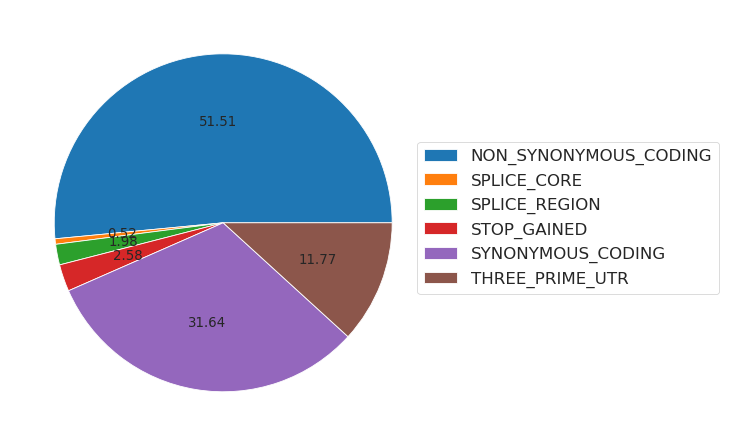

In [26]:
## Figure of the number of snp
fig, pie = plt.subplots()
pie = plt.pie(list(Non_SNP.groupby(['effect']).size().drop('INTRONIC').values), autopct="%.2f", startangle=0)
fig.legend(pie[0],list(Non_SNP.groupby(['effect']).size().drop('INTRONIC').index), 
           bbox_to_anchor=(1,0.45), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
fig.subplots_adjust(left=0.0, bottom=0.0, right=0.6)

In [27]:
base_font_size = 10
rcParams['font.size'] = base_font_size
rcParams['axes.titlesize'] = base_font_size
rcParams['axes.labelsize'] = 8
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8

<Figure size 720x480 with 0 Axes>

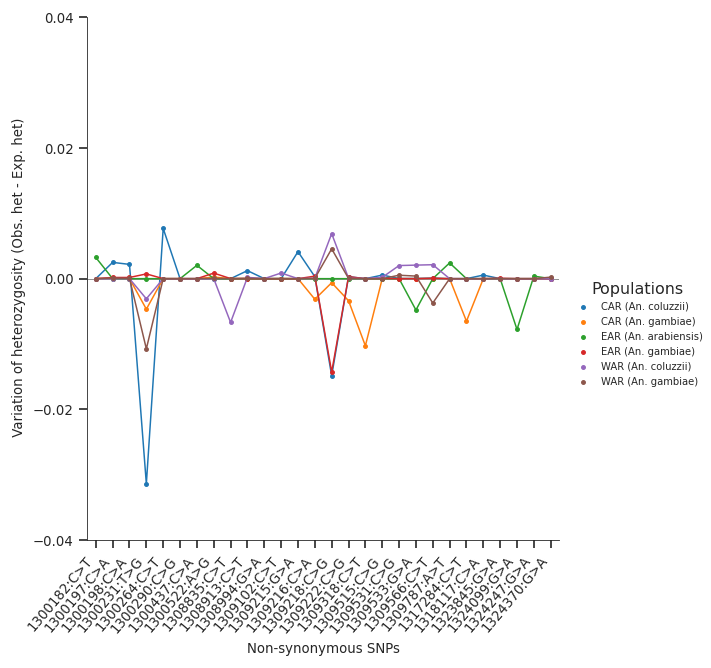

In [40]:
## Plotting heterozygosity 
df_het = Het_df.iloc[:,[1,12,14,16,18,24,27]]
#rename col names 
col_name = {}
for item in df_het.columns[1:]:
    col_name[item] = item.split(' F)')[0]+')'
df_het = df_het.rename(columns=col_name)

#Warp the data table 
df_het_melt = df_het.melt('position', var_name='cols', value_name='vals')
pops = df_het.columns[1:] #[item.split(' F)')[0]+')' for item in df_het.columns[1:]]

## Create a plot 
fig = plt.figure(figsize=(6,4))
fig = sns.catplot(x="position", y="vals", hue='cols', data=df_het_melt, legend = False, kind='point')
fig.set(xlabel = 'Non-synonymous SNPs', ylabel = ' Variation of heterozygosity (Obs. het - Exp. het)', 
        yticks=(-0.04, -0.02, 0, 0.02, 0.04))
#Variation of heterozygosity = Obs. heterozygosity - Exp. heterozygosity
fig.set_xticklabels(list(Het_df.mut_pos), rotation = 50, ha = 'right')
fig.add_legend(title='Populations', label_order = pops,fontsize='6')

## Plot horizontal axis where data are in Hardy weimberg eauilibrium 
for ax1 in fig.axes[0]:
    ax1.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

fig.savefig("Graph/HW_plot.png", dpi=300, bbox_inches='tight')

In [29]:
## Preparing plot 
cohorts = cohort_.copy()
keys = ['BFA (An. arabiensis)', 'CMR (An. arabiensis)', 'MLI (An. arabiensis)']
list(map(cohorts.pop, keys))
#cohorts

color_1 = sns.light_palette("darkslategray",n_colors=100)
color_2 = sns.color_palette("ch:s=16,rot=0.05,dark=0.18,light=0.99", as_cmap=True)
color_1

[(0.9243251607982169, 0.9485808685681695, 0.9484666801442928),
 (0.9185211495408991, 0.9435708532975848, 0.9434575604691895),
 (0.9098151326549224, 0.9360558303917079, 0.9359438809565347),
 (0.9040111213976045, 0.9310458151211233, 0.9309347612814314),
 (0.8953051045116278, 0.9235307922152463, 0.9234210817687765),
 (0.88950109325431, 0.9185207769446616, 0.9184119620936733),
 (0.8807950763683333, 0.9110057540387847, 0.9108982825810183),
 (0.8720890594823566, 0.9034907311329077, 0.9033846030683634),
 (0.8662850482250388, 0.898480715862323, 0.8983754833932602),
 (0.8575790313390621, 0.8909656929564461, 0.8908618038806053),
 (0.8517750200817443, 0.8859556776858615, 0.8858526842055021),
 (0.8430690031957676, 0.8784406547799845, 0.8783390046928472),
 (0.8343629863097909, 0.8709256318741075, 0.8708253251801923),
 (0.8285589750524731, 0.8659156166035229, 0.8658162055050891),
 (0.8198529581664963, 0.8584005936976459, 0.8583025259924342),
 (0.8140489469091785, 0.8533905784270612, 0.853293406317331),
 (0.8053429300232018, 0.8458755555211843, 0.8457797268046761),
 (0.799538918765884, 0.8408655402505997, 0.8407706071295727),
 (0.7908329018799073, 0.8333505173447227, 0.8332569276169179),
 (0.7821268849939306, 0.8258354944388457, 0.825743248104263),
 (0.7763228737366128, 0.8208254791682611, 0.8207341284291597),
 (0.7676168568506361, 0.8133104562623841, 0.8132204489165049),
 (0.7618128455933182, 0.8083004409917994, 0.8082113292414016),
 (0.7531068287073415, 0.8007854180859225, 0.8006976497287467),
 (0.7444008118213647, 0.7932703951800455, 0.7931839702160919),
 (0.738596800564047, 0.788260379909461, 0.7881748505409886),
 (0.7298907836780703, 0.7807453570035839, 0.7806611710283337),
 (0.7240867724207525, 0.7757353417329993, 0.7756520513532305),
 (0.7153807555347758, 0.7682203188271224, 0.7681383718405755),
 (0.709576744277458, 0.7632103035565376, 0.7631292521654722),
 (0.7008707273914813, 0.7556952806506607, 0.7556155726528174),
 (0.6921647105055045, 0.7481802577447838, 0.7481018931401625),
 (0.6863606992481868, 0.7431702424741992, 0.7430927734650592),
 (0.67765468236221, 0.7356552195683221, 0.7355790939524044),
 (0.6718506711048922, 0.7306452042977375, 0.7305699742773011),
 (0.6631446542189154, 0.7231301813918606, 0.7230562947646462),
 (0.6544386373329387, 0.7156151584859836, 0.7155426152519914),
 (0.6486346260756208, 0.7106051432153989, 0.710533495576888),
 (0.6399286091896442, 0.703090120309522, 0.7030198160642331),
 (0.6341245979323265, 0.6980801050389374, 0.6980106963891299),
 (0.6254185810463497, 0.6905650821330603, 0.690497016876475),
 (0.616712564160373, 0.6830500592271834, 0.6829833373638201),
 (0.6109085529030551, 0.6780400439565988, 0.6779742176887169),
 (0.6022025360170784, 0.6705250210507218, 0.670460538176062),
 (0.5963985247597606, 0.6655150057801371, 0.6654514185009588),
 (0.5876925078737839, 0.6579999828742602, 0.6579377389883039),
 (0.5818884966164661, 0.6529899676036754, 0.6529286193132007),
 (0.5731824797304894, 0.6454749446977985, 0.6454149398005458),
 (0.5644764628445127, 0.6379599217919216, 0.6379012602878908),
 (0.5586724515871948, 0.6329499065213369, 0.6328921406127876),
 (0.5499664347012181, 0.62543488361546, 0.6253784611001327),
 (0.5441624234439004, 0.6204248683448754, 0.6203693414250295),
 (0.5354564065579236, 0.6129098454389983, 0.6128556619123746),
 (0.526750389671947, 0.6053948225331214, 0.6053419823997197),
 (0.5209463784146291, 0.6003848072625368, 0.6003328627246165),
 (0.5122403615286524, 0.5928697843566597, 0.5928191832119615),
 (0.5064363502713345, 0.5878597690860752, 0.5878100635368583),
 (0.4977303333853579, 0.5803447461801983, 0.5802963840242035),
 (0.49192632212804, 0.5753347309096135, 0.5752872643491),
 (0.48322030524206333, 0.5678197080037366, 0.5677735848364452),
 (0.47451428835608667, 0.5603046850978597, 0.5602599053237904),
 (0.4687102770987688, 0.5552946698272749, 0.555250785648687),
 (0.4600042602127921, 0.547779646921398, 0.5477371061360322),
 (0.4542002489554743, 0.5427696316508134, 0.54272798646

In [44]:
base_font_size = 8
rcParams['font.size'] = base_font_size
rcParams['axes.titlesize'] = 10
rcParams['axes.labelsize'] = 10
rcParams['xtick.labelsize'] = base_font_size
rcParams['ytick.labelsize'] = base_font_size
rcParams['legend.fontsize'] = 10


/tmp/ipykernel_4801/1654429901.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


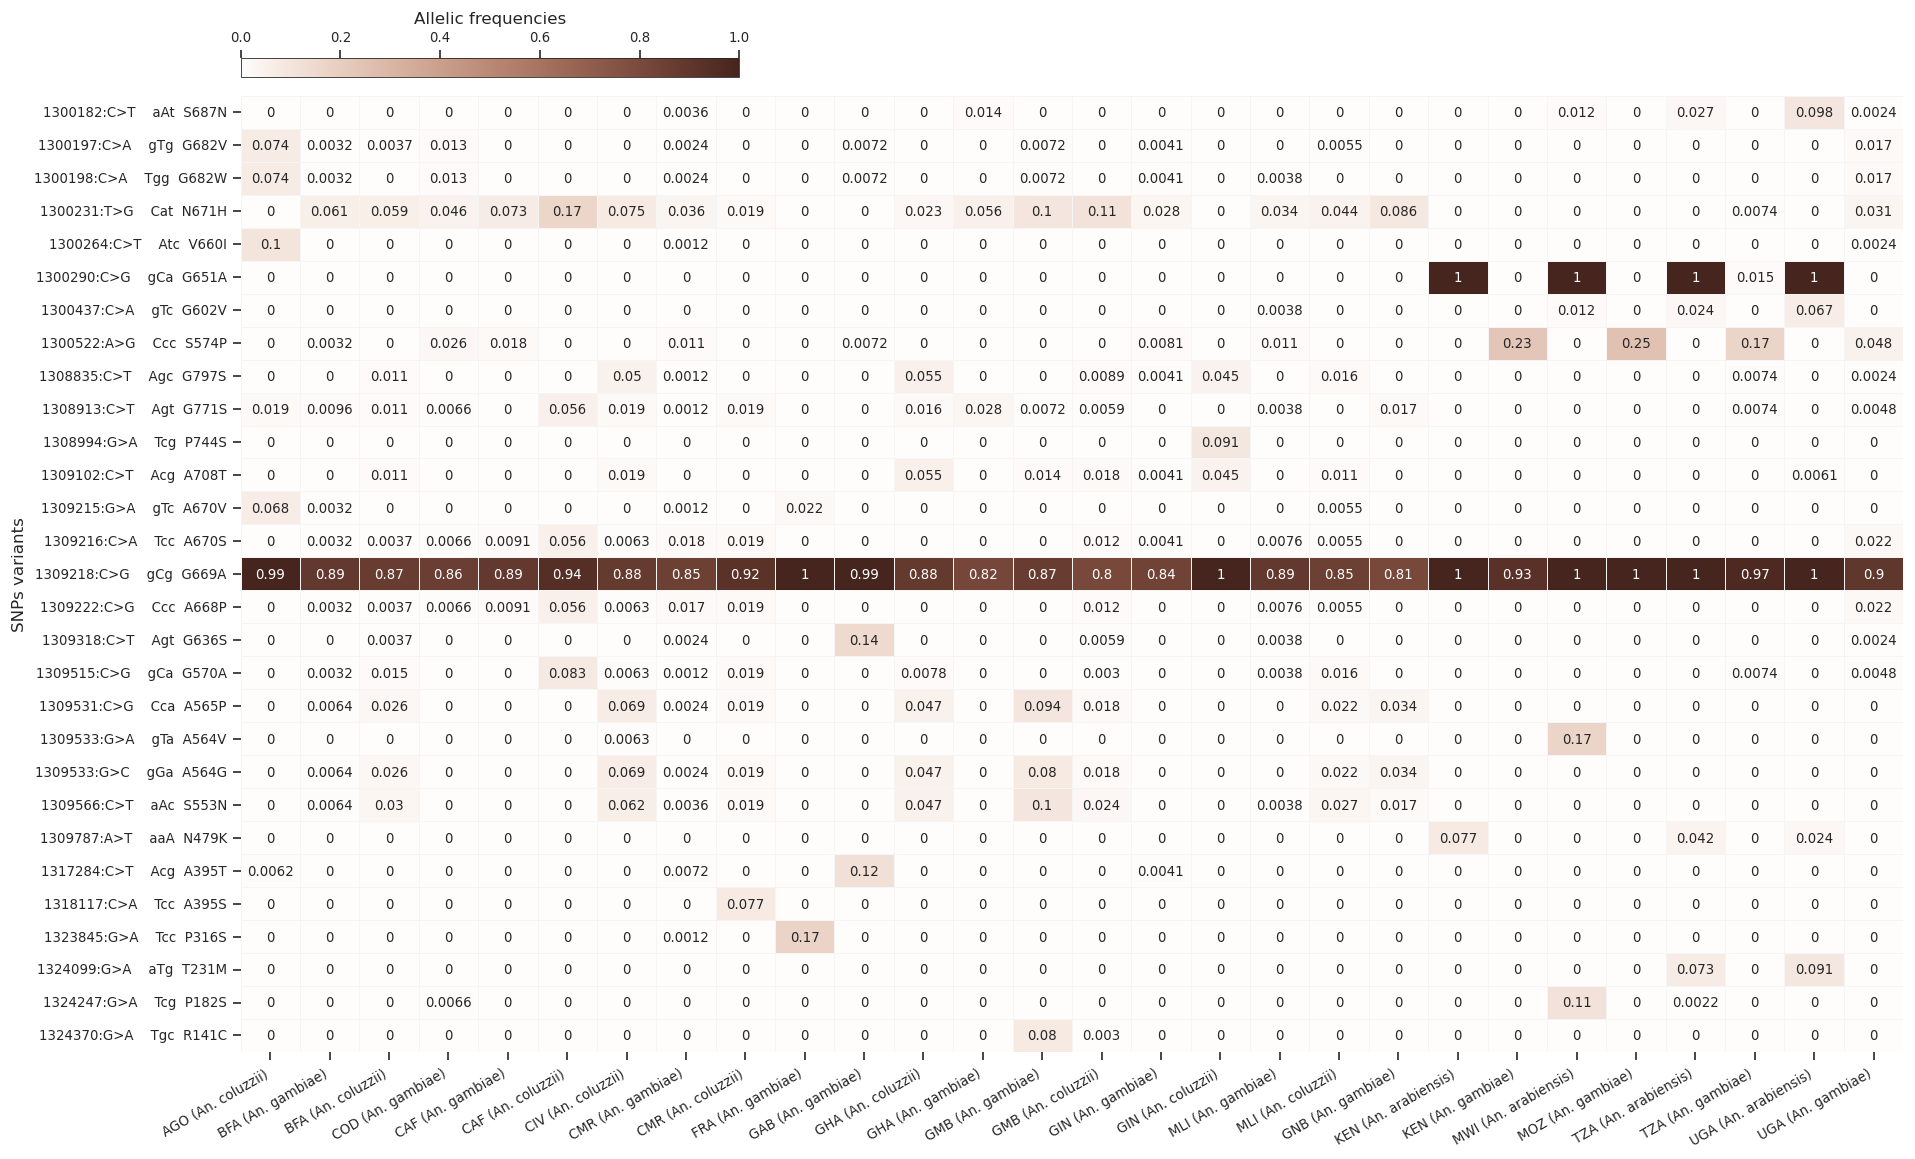

In [45]:
# plot allele freqs per pop
# plot allele freqs per pop
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(figsize=(16,9))
labels = ['%s:%s>%s %s %s' % (rec.position, rec.ref_allele, rec.alt_allele, rec['alt_codon'].rjust(6), rec['aa_change'].rjust(6))
          for rec in fd1.records()]
# plot
ax1=sns.heatmap(snp_drop[cohorts], ax=ax, vmin=0,vmax=1,cmap=color_2, yticklabels=labels,linewidths=0.5,
               linecolor="whitesmoke",annot=True, cbar=False)
plt.xticks(rotation=30, ha='right')
#ax1.set_xlabel('Vectors populations')
ax1.set_ylabel('SNPs variants')
cax = inset_axes(ax,width="30%", height="2%", loc='lower left', bbox_to_anchor=(0, 1.02, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='Allelic frequencies')
fig.tight_layout()
fig.savefig('Graph/plot_fq', dpi=300, bbox_inches='tight')

In [31]:
## Fitrate the Non-synonymous snp where max_al_freq > 0.01 
subset_ra1 = snps_ra.query("effect == 'NON_SYNONYMOUS_CODING' and max_af >= 0.1 and pass_gamb_colu == True")
subset_rb1 = snps_rb.query("effect == 'NON_SYNONYMOUS_CODING' and max_af >= 0.1 and pass_gamb_colu == True")
subset_rc1 = snps_rc.query("effect == 'NON_SYNONYMOUS_CODING' and max_af >= 0.1 and pass_gamb_colu == True")
subset_rd1 = snps_rd.query("effect == 'NON_SYNONYMOUS_CODING' and max_af >= 0.1 and pass_gamb_colu == True")
subset_re1 = snps_re.query("effect == 'NON_SYNONYMOUS_CODING' and max_af >= 0.1 and pass_gamb_colu == True")

## Create a DataFrame 
frames1 = [subset_ra1, subset_rb1, subset_rc1, subset_rd1, subset_re1]
snp_all1 = pd.concat(frames1)
# drop duplicates values 
snp_sup = snp_all1.reset_index().drop_duplicates(subset=['position', 'alt_allele'])
#frames
#insert the variable transcripts in the DataFrame at position 9
#snp_all.insert(9, 'trancripts', transcripts)
snp_sup = snp_sup.sort_values(by=['position'])

#rename freq col name 
col_name = {}
for col in snp_sup.columns:
    if col.split('_')[0]=='frq': 
        col_name[col] = col.split('frq_')[1]
snp_sup = snp_sup.rename(columns=col_name)
ptl_df = ptl.fromdataframe(snp_sup)
#del col_name
#snp_drop.to_csv('R/Non_synonymous_snp_filt.csv') ## Save to .csv for linkage desequilibrium analysis
#print(Fore.MAGENTA + 'done...', Style.RESET_ALL)

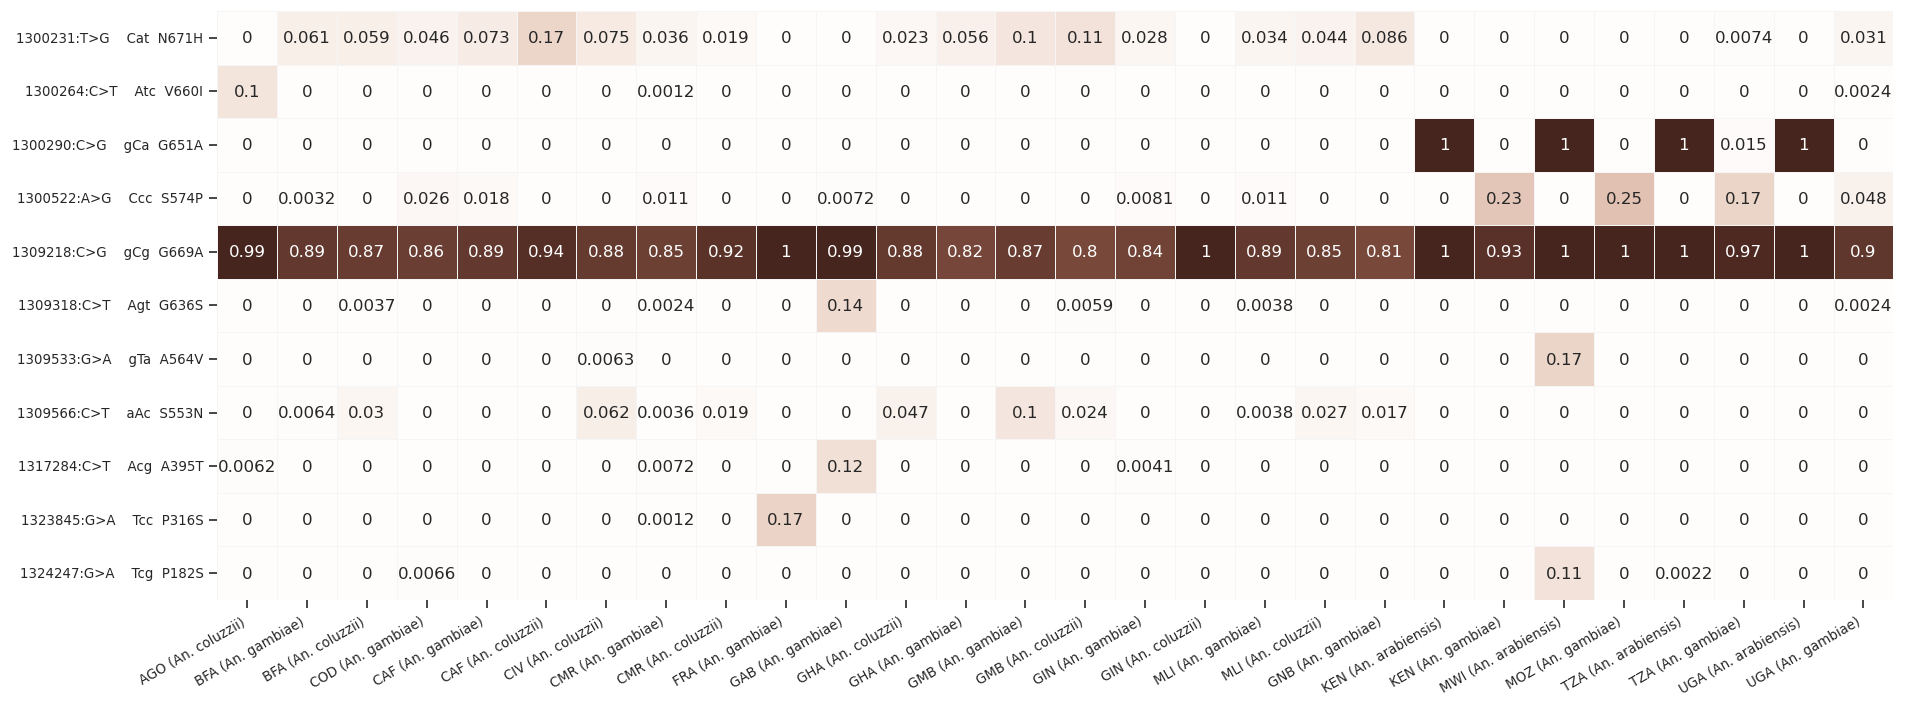

In [32]:
# plot allele freqs per pop
fig = plt.figure(figsize=(16,6), dpi=120)

labels = ['%s:%s>%s %s %s' % (rec.position, rec.ref_allele, rec.alt_allele, rec['alt_codon'].rjust(6), rec['aa_change'].rjust(6))
          for rec in ptl_df.records()]
# plot
ax=sns.heatmap(snp_sup[cohorts], vmin=0,vmax=1,cmap=color_2, yticklabels=labels,linewidths=0.5,
               linecolor="whitesmoke", annot=True, cbar=False)
plt.xticks(rotation=30, ha='right') 
#ax.set_title("Alternative alleles frequencies per population within the AGAP000080 gene")

fig.tight_layout()
fig.savefig('Graph/plot_fq1', dpi=300, bbox_inches='tight')

/tmp/ipykernel_4801/731346323.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


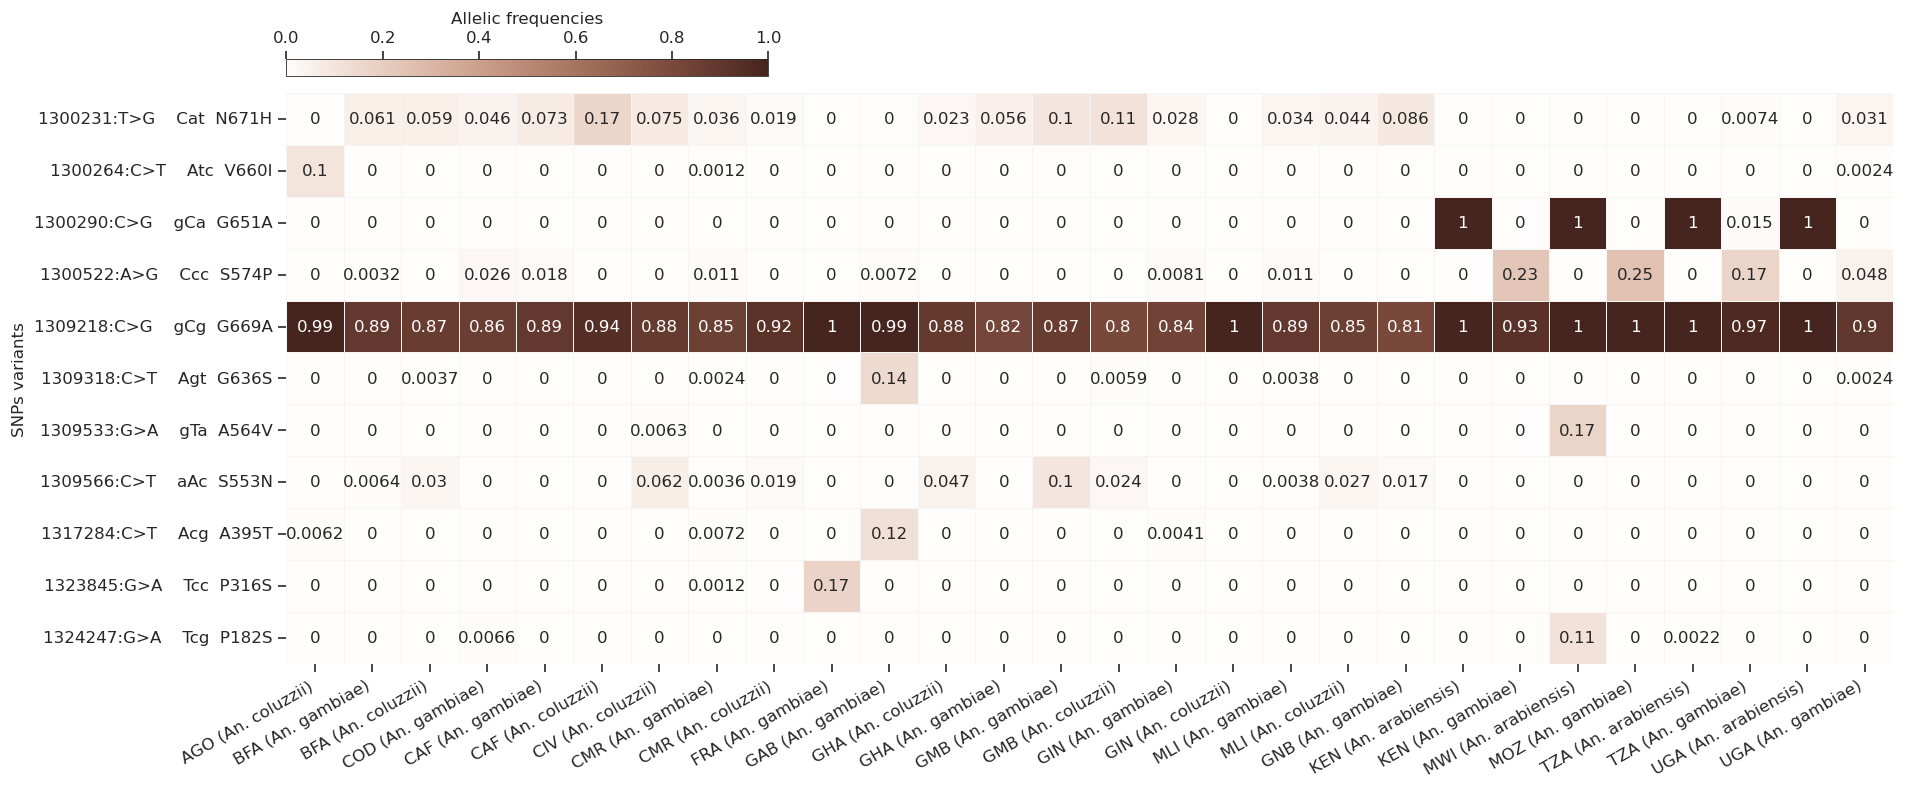

In [43]:
# plot allele freqs per pop
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(figsize=(16,6))
labels = ['%s:%s>%s %s %s' % (rec.position, rec.ref_allele, rec.alt_allele, rec['alt_codon'].rjust(6), rec['aa_change'].rjust(6))
          for rec in ptl_df.records()]
# plot
ax1=sns.heatmap(snp_sup[cohorts], ax=ax, vmin=0,vmax=1,cmap=color_2, yticklabels=labels,linewidths=0.5,
                linecolor="whitesmoke", annot=True, cbar=False)
plt.xticks(rotation=30, ha='right')
#ax1.set_xlabel('Vectors populations')
ax1.set_ylabel('SNPs variants')
cax = inset_axes(ax,width="30%", height="3%", loc='lower left', bbox_to_anchor=(0, 1.03, 1, 1),
                 bbox_transform=ax.transAxes,borderpad=0)
mpl.colorbar.ColorbarBase(cax,orientation='horizontal', ticklocation='top',cmap=color_2,
                         label='Allelic frequencies')

fig.tight_layout()

fig.savefig('Graph/plot_fq2', dpi=300, bbox_inches='tight')